In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import tensorflow.keras.layers as tfl
from random import randrange

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, Rescaling
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

import os
from numpy import genfromtxt
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Conv3D, Conv2D, ZeroPadding2D, Activation, Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Lambda, Flatten, Dense
from tensorflow.image import rgb_to_grayscale
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from numpy import expand_dims

In [2]:
model = tf.keras.models.load_model('models/model_v1')

In [4]:
model.summary()

Model: "Model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_79 (InputLayer)        [(None, 64, 64, 3)]       0         
_________________________________________________________________
sequential_68 (Sequential)   (None, 64, 64, 3)         0         
_________________________________________________________________
CONV1 (Conv2D)               (None, 62, 62, 16)        448       
_________________________________________________________________
BN1 (BatchNormalization)     (None, 62, 62, 16)        248       
_________________________________________________________________
activation_128 (Activation)  (None, 62, 62, 16)        0         
_________________________________________________________________
max_pooling2d_160 (MaxPoolin (None, 30, 30, 16)        0         
_________________________________________________________________
CONV2 (Conv2D)               (None, 28, 28, 16)        2320 

In [107]:
BATCH_SIZE = 256
IMG_SIZE = (64, 64)
directory = "dataset/"
seed = randrange(100)
print('seed:', seed)
train_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='training',
                                             seed=seed)
validation_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='validation',
                                             seed=seed)

seed: 34
Found 2228 files belonging to 2 classes.
Using 1783 files for training.
Found 2228 files belonging to 2 classes.
Using 445 files for validation.


In [108]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=20),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_dataset, validation_data=validation_dataset, epochs=500, 
                   callbacks = my_callbacks)

Epoch 1/500
7/7 [==============================] - 6s 606ms/step - loss: 0.1672 - accuracy: 0.9692 - val_loss: 0.2014 - val_accuracy: 0.9461
Epoch 2/500
7/7 [==============================] - 4s 558ms/step - loss: 0.1840 - accuracy: 0.9574 - val_loss: 0.2033 - val_accuracy: 0.9438
Epoch 3/500
7/7 [==============================] - 4s 565ms/step - loss: 0.1731 - accuracy: 0.9635 - val_loss: 0.2074 - val_accuracy: 0.9483
Epoch 4/500
7/7 [==============================] - 5s 573ms/step - loss: 0.1696 - accuracy: 0.9602 - val_loss: 0.2067 - val_accuracy: 0.9461
Epoch 5/500
7/7 [==============================] - 5s 571ms/step - loss: 0.1740 - accuracy: 0.9602 - val_loss: 0.2046 - val_accuracy: 0.9461
Epoch 6/500
7/7 [==============================] - 5s 578ms/step - loss: 0.1700 - accuracy: 0.9663 - val_loss: 0.2064 - val_accuracy: 0.9438
Epoch 7/500
7/7 [==============================] - 5s 564ms/step - loss: 0.1621 - accuracy: 0.9680 - val_loss: 0.2107 - val_accuracy: 0.9416
Epoch 8/500
7

Epoch 59/500
7/7 [==============================] - 5s 574ms/step - loss: 0.1677 - accuracy: 0.9647 - val_loss: 0.1904 - val_accuracy: 0.9483
Epoch 60/500
7/7 [==============================] - 5s 569ms/step - loss: 0.1616 - accuracy: 0.9759 - val_loss: 0.1893 - val_accuracy: 0.9483
Epoch 61/500
7/7 [==============================] - 5s 572ms/step - loss: 0.1673 - accuracy: 0.9652 - val_loss: 0.1896 - val_accuracy: 0.9506
Epoch 62/500
7/7 [==============================] - 5s 569ms/step - loss: 0.1736 - accuracy: 0.9658 - val_loss: 0.1903 - val_accuracy: 0.9483
Epoch 63/500
7/7 [==============================] - 5s 570ms/step - loss: 0.1633 - accuracy: 0.9697 - val_loss: 0.1920 - val_accuracy: 0.9506
Epoch 64/500
7/7 [==============================] - 5s 571ms/step - loss: 0.1674 - accuracy: 0.9630 - val_loss: 0.1921 - val_accuracy: 0.9528
Epoch 65/500
7/7 [==============================] - 5s 573ms/step - loss: 0.1680 - accuracy: 0.9680 - val_loss: 0.1982 - val_accuracy: 0.9461
Epoch 

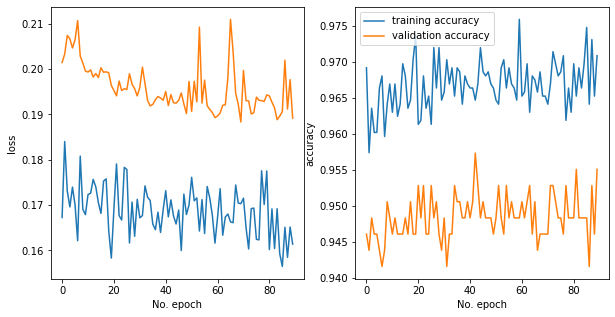

In [113]:
figure, ax = plt.subplots(1, 2, figsize = (10, 5))

ax[0].plot(history.history['loss'], label='training loss')
ax[0].plot(history.history['val_loss'], label='validation loss')

ax[1].plot(history.history['accuracy'], label='training accuracy')
ax[1].plot(history.history['val_accuracy'], label='validation accuracy')

ax[0].set_ylabel('loss')
ax[0].set_xlabel('No. epoch')
   
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('No. epoch')

plt.legend(loc="upper left")
plt.show()

In [111]:
model.evaluate(validation_dataset)
model.evaluate(train_dataset)

7/7 [==============================] - 2s 163ms/step - loss: 0.1567 - accuracy: 0.9736


[0.15671585500240326, 0.9736399054527283]

In [112]:
model.save('models/model_v2')

INFO:tensorflow:Assets written to: models/model_v2/assets


In [114]:
layer_outputs = [layer.output for layer in model.layers]

feature_map_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs[2:])

In [115]:
img = load_img('dataset/Test14.png', target_size=(64, 64))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = feature_map_model.predict(img)

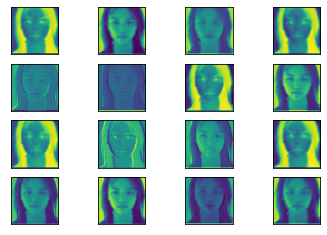

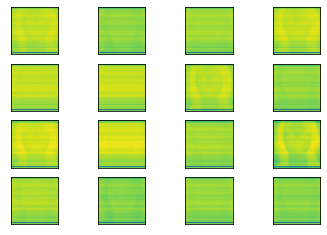

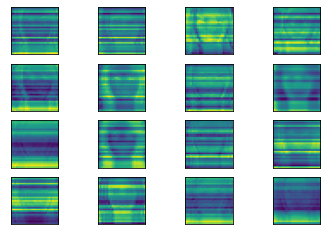

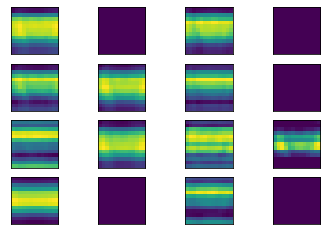

In [116]:
square = 4
for fmap in [feature_maps[i] for i in [0, 1, 4, 7]]:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = plt.subplot(square, square, ix)
            
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			plt.imshow(fmap[0, :, :, ix-1])
			ix += 1
	# show the figure
	plt.show()

### Prediction > 0.5 implies the system thinks the image is Lynn
### Prediction <= 0.5 implies the system thinks the image is Brad

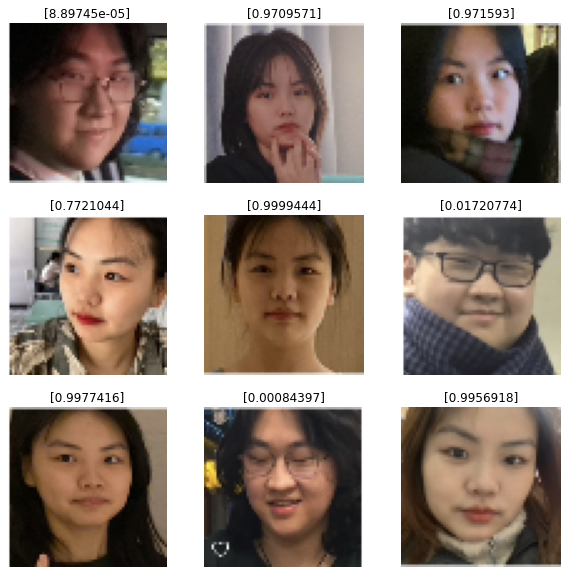

In [122]:
image_batch, label_batch = next(iter(train_dataset))
output = model.predict(image_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(output[i])
    plt.axis("off")